In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Interpolation in 1-D: `numpy` arrays

## Linear interpolation

Data source: https://www.weather.gov/wrh/climate?wfo=sew

In [2]:
# Seattle  monthly mean temperature, 2022
dates = np.array([datetime(2022, month, 15) for month in range(1, 13)])
temps = np.array([41.4, 42.8, 47.3, 48.6, 54.1, 61.6, 69.2, 70.5, 65.4, 58.4, 42.9, 39.3])

display(dates)
display(temps)

array([datetime.datetime(2022, 1, 15, 0, 0),
       datetime.datetime(2022, 2, 15, 0, 0),
       datetime.datetime(2022, 3, 15, 0, 0),
       datetime.datetime(2022, 4, 15, 0, 0),
       datetime.datetime(2022, 5, 15, 0, 0),
       datetime.datetime(2022, 6, 15, 0, 0),
       datetime.datetime(2022, 7, 15, 0, 0),
       datetime.datetime(2022, 8, 15, 0, 0),
       datetime.datetime(2022, 9, 15, 0, 0),
       datetime.datetime(2022, 10, 15, 0, 0),
       datetime.datetime(2022, 11, 15, 0, 0),
       datetime.datetime(2022, 12, 15, 0, 0)], dtype=object)

array([41.4, 42.8, 47.3, 48.6, 54.1, 61.6, 69.2, 70.5, 65.4, 58.4, 42.9,
       39.3])

### Interpolate to the first of each month 

In [3]:
# Dates we want to interpolate to
dates_first = np.array([datetime(2022, month, 1) for month in range(1, 13)])

# Interpolate with np.interp()
temps_first = np.interp(mdates.date2num(dates_first), mdates.date2num(dates), temps)
display(temps_first)

array([41.4       , 42.16774194, 45.05      , 48.01290323, 51.53333333,
       58.21290323, 65.65333333, 69.91290323, 67.70322581, 61.66666667,
       49.9       , 40.98      ])

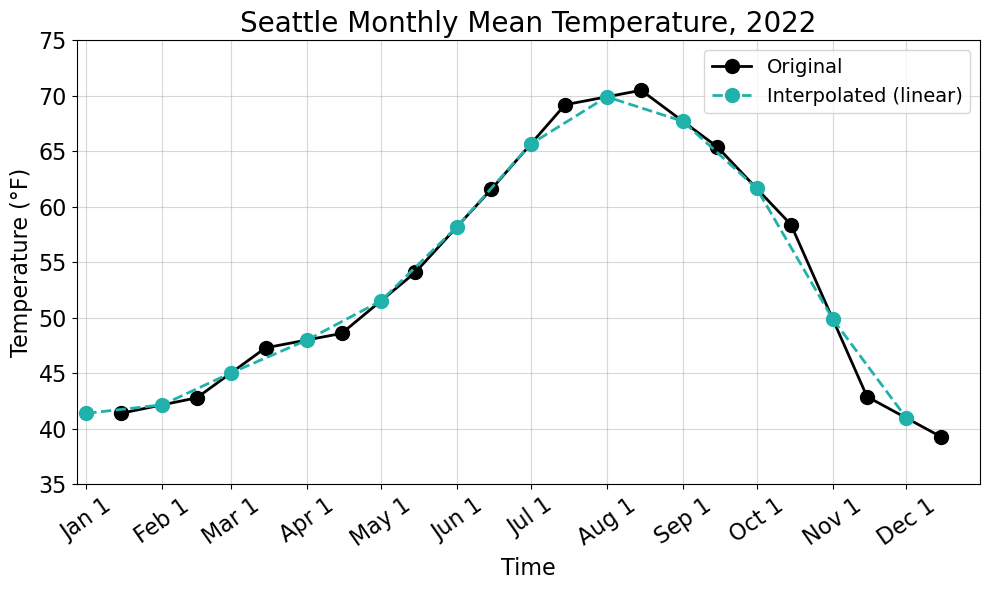

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(dates, temps, 'o-', c='k', markersize=10, lw=2, label="Original")
ax.plot(dates_first, temps_first, 'o--', c='lightseagreen', 
        markersize=10, lw=2, label="Interpolated (linear)")
ax.set_xlabel('Time', fontsize=16)
ax.set_ylabel(f'Temperature (\N{DEGREE SIGN}F)', fontsize=16)
ax.set_title("Seattle Monthly Mean Temperature, 2022", fontsize=20)
ax.tick_params(axis='both', labelsize=16)
ax.tick_params(axis='x', rotation=35)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %-d'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.grid(alpha=0.5)
ax.set_xlim([datetime(2021, 12, 28), datetime(2022, 12, 31)])
ax.set_ylim([35, 75])
ax.legend(fontsize=14)
plt.tight_layout()

### Interpolate to a particular date:

In [5]:
# Date we want to interpolate to
birthday = datetime(2022, 5, 13) # this can also be an array of dates

birthday_temp = np.interp(mdates.date2num(birthday), mdates.date2num(dates), temps)

print("The average temperature on May 13, 2022, was approximately", birthday_temp, f"\N{DEGREE SIGN}F.")

The average temperature on May 13, 2022, was approximately 53.733333333333334 °F.


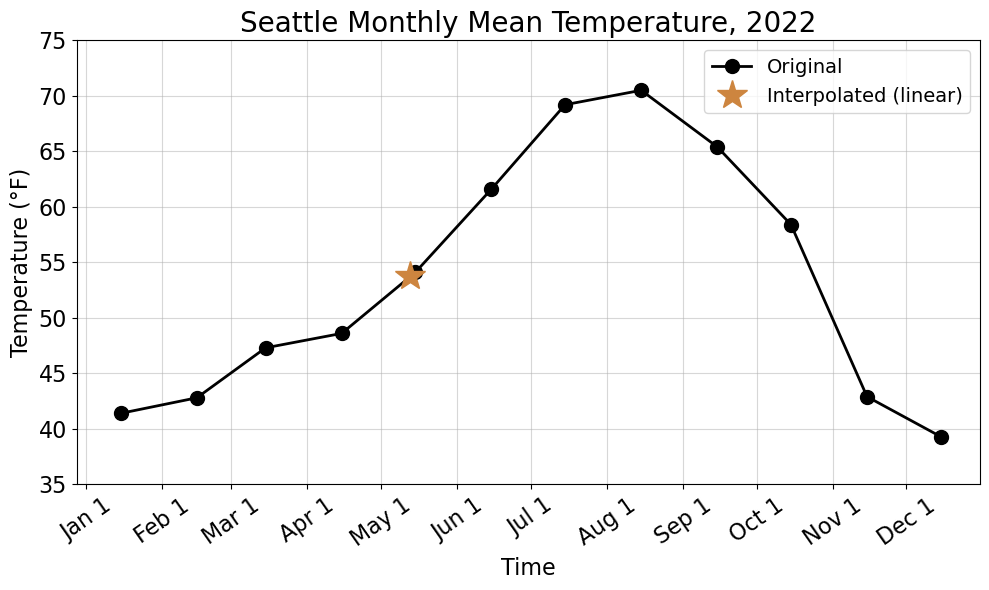

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(dates, temps, 'o-', c='k', markersize=10, lw=2, label="Original")
ax.plot(birthday, birthday_temp, '*', c='peru', 
        markersize=22, lw=2, label="Interpolated (linear)")
ax.set_xlabel('Time', fontsize=16)
ax.set_ylabel(f'Temperature (\N{DEGREE SIGN}F)', fontsize=16)
ax.set_title("Seattle Monthly Mean Temperature, 2022", fontsize=20)
ax.tick_params(axis='both', labelsize=16)
ax.tick_params(axis='x', rotation=35)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %-d'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.grid(alpha=0.5)
ax.set_xlim([datetime(2021, 12, 28), datetime(2022, 12, 31)])
ax.set_ylim([35, 75])
ax.legend(fontsize=14)
plt.tight_layout()

### Interpolate (resample) to a higher frequency

In [7]:
# Dates we want to interpolate to
dates_daily = np.array([datetime(2022, 1, 1) + timedelta(days=i) for i in range(365)])

# Interpolate with np.interp()
temps_daily = np.interp(mdates.date2num(dates_daily), mdates.date2num(dates), temps)
print(temps_daily[0:50])

[41.4        41.4        41.4        41.4        41.4        41.4
 41.4        41.4        41.4        41.4        41.4        41.4
 41.4        41.4        41.4        41.44516129 41.49032258 41.53548387
 41.58064516 41.62580645 41.67096774 41.71612903 41.76129032 41.80645161
 41.8516129  41.89677419 41.94193548 41.98709677 42.03225806 42.07741935
 42.12258065 42.16774194 42.21290323 42.25806452 42.30322581 42.3483871
 42.39354839 42.43870968 42.48387097 42.52903226 42.57419355 42.61935484
 42.66451613 42.70967742 42.75483871 42.8        42.96071429 43.12142857
 43.28214286 43.44285714]


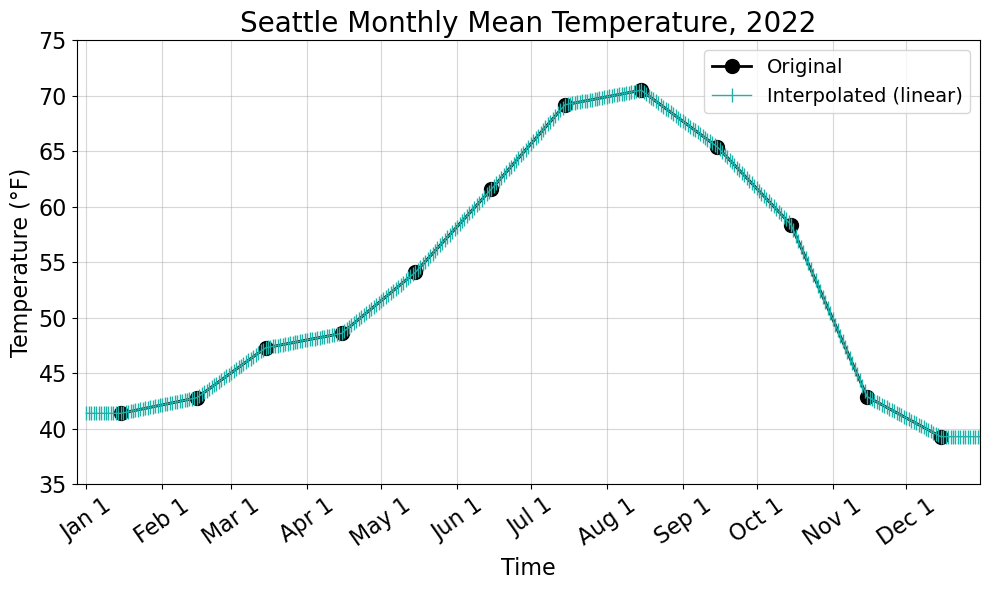

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(dates, temps, 'o-', c='k', markersize=10, lw=2, label="Original")
ax.plot(dates_daily, temps_daily, '|-', c='lightseagreen', markersize=10, lw=1, label="Interpolated (linear)")
ax.set_xlabel('Time', fontsize=16)
ax.set_ylabel(f'Temperature (\N{DEGREE SIGN}F)', fontsize=16)
ax.set_title("Seattle Monthly Mean Temperature, 2022", fontsize=20)
ax.tick_params(axis='both', labelsize=16)
ax.tick_params(axis='x', rotation=35)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %-d'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.grid(alpha=0.5)
ax.set_xlim([datetime(2021, 12, 28), datetime(2022, 12, 31)])
ax.set_ylim([35, 75])
ax.legend(fontsize=14)
plt.tight_layout()

### Dealing with `NaN` values through interpolation

In [9]:
# Seattle  monthly mean temperature, 2023
dates = np.array([datetime(2023, month, 15) for month in range(1, 13)])
temps = np.array([43.5, 41.4, 45.1, 49.3, 60.4,  np.NaN, 68.5, 69.7, 62.1, 55. , 46.1, 45.2])

In [10]:
# Create versions of our arrays with no NaN values
dates_clean = dates[~np.isnan(temps)]
temps_clean = temps[~np.isnan(temps)]

# Perform interpolation on the original dates array using the cleaned arrays
temps_filled = np.interp(mdates.date2num(dates), mdates.date2num(dates_clean), temps_clean)
display(temps_filled)

array([43.5       , 41.4       , 45.1       , 49.3       , 60.4       ,
       64.51639344, 68.5       , 69.7       , 62.1       , 55.        ,
       46.1       , 45.2       ])

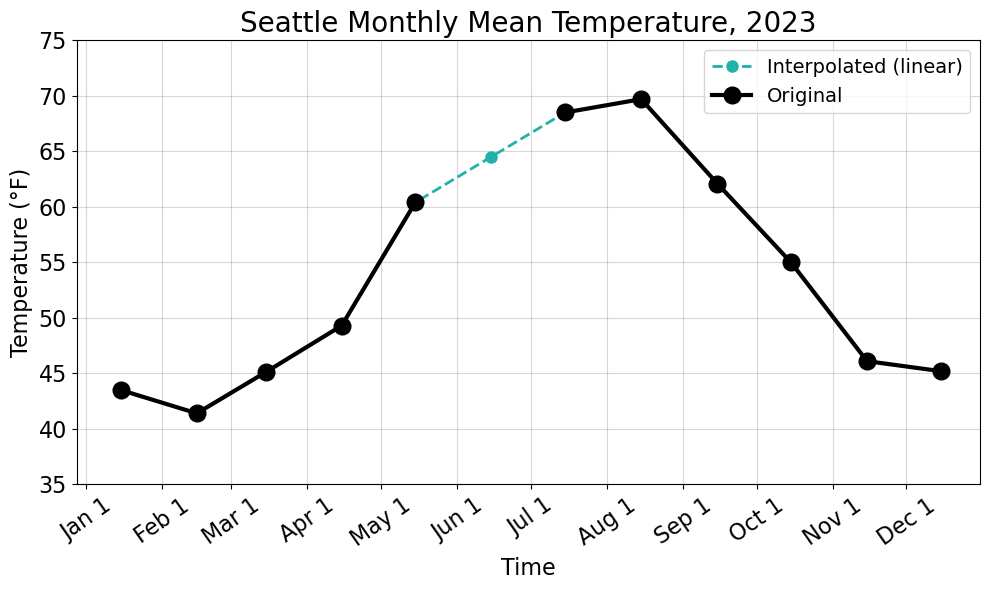

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(dates, temps_filled, 'o--', c='lightseagreen', markersize=8, lw=2, label="Interpolated (linear)")
ax.plot(dates, temps, 'o-', c='k', markersize=12, lw=3, label="Original")
ax.set_xlabel('Time', fontsize=16)
ax.set_ylabel(f'Temperature (\N{DEGREE SIGN}F)', fontsize=16)
ax.set_title("Seattle Monthly Mean Temperature, 2023", fontsize=20)
ax.tick_params(axis='both', labelsize=16)
ax.tick_params(axis='x', rotation=35)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %-d'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.grid(alpha=0.5)
ax.set_xlim([datetime(2022, 12, 28), datetime(2023, 12, 31)])
ax.set_ylim([35, 75])
ax.legend(fontsize=14)
plt.tight_layout()

## Cubic interpolation with `CubicSpline`

In [12]:
from scipy.interpolate import CubicSpline

In [13]:
# Create a Cubic Spline interpolator object from our x and y arrays
spl = CubicSpline(mdates.date2num(dates_clean), temps_clean)

# Interpolate at the new x values using our interpolator object 
temps_filled_cubic = spl(mdates.date2num(dates))

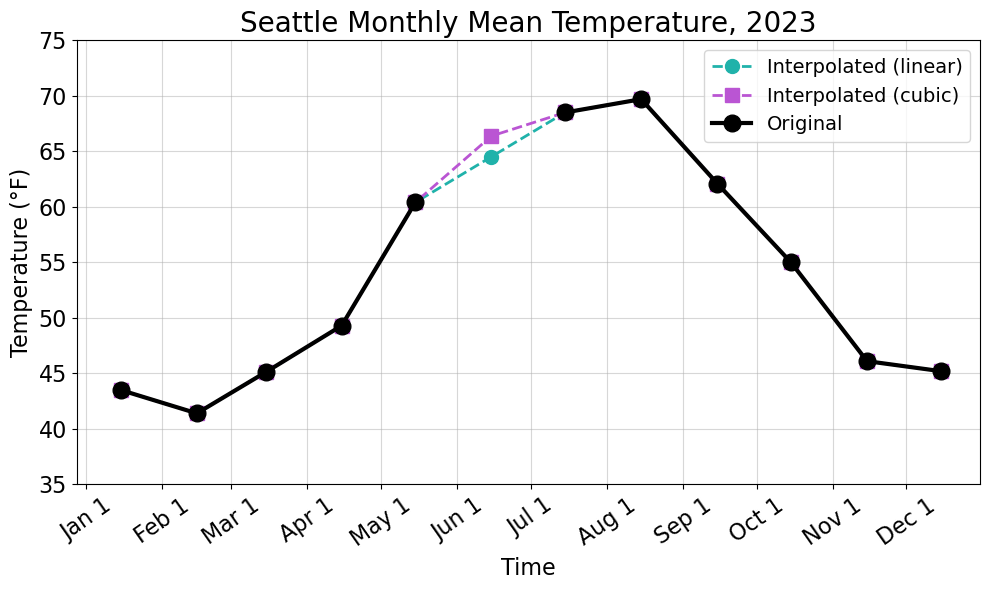

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(dates, temps_filled, 'o--', c='lightseagreen', markersize=10, lw=2, label="Interpolated (linear)")
ax.plot(dates, temps_filled_cubic, 's--', c='mediumorchid', markersize=10, lw=2, label="Interpolated (cubic)")
ax.plot(dates, temps, 'o-', c='k', markersize=12, lw=3, label="Original")
ax.set_xlabel('Time', fontsize=16)
ax.set_ylabel(f'Temperature (\N{DEGREE SIGN}F)', fontsize=16)
ax.set_title("Seattle Monthly Mean Temperature, 2023", fontsize=20)
ax.tick_params(axis='both', labelsize=16)
ax.tick_params(axis='x', rotation=35)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %-d'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.grid(alpha=0.5)
ax.set_xlim([datetime(2022, 12, 28), datetime(2023, 12, 31)])
ax.set_ylim([35, 75])
ax.legend(fontsize=14)
plt.tight_layout()

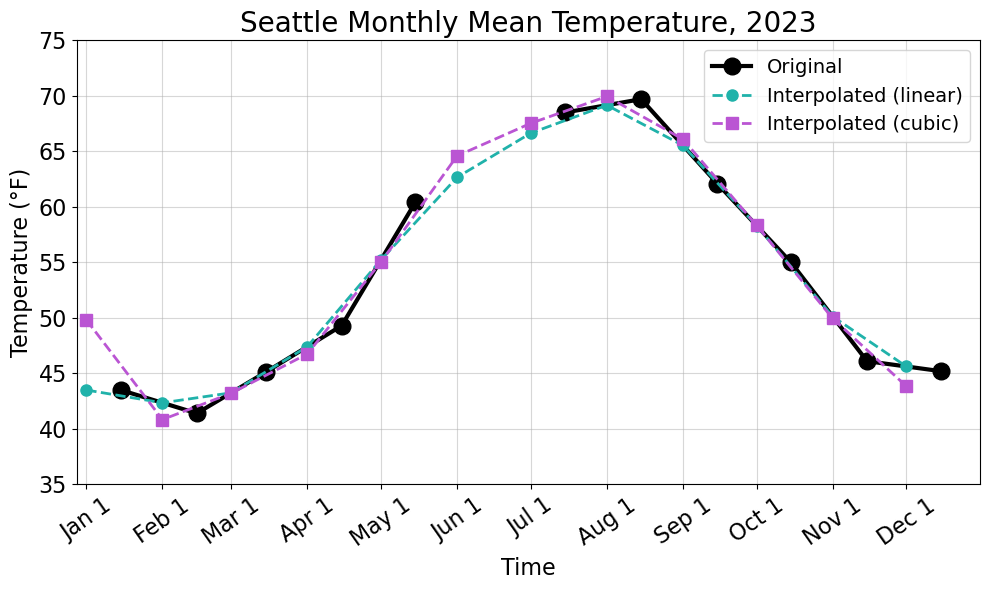

In [15]:
# Interpolate to first of the month with Cubic Spline
dates_first = np.array([datetime(2023, month, 1) for month in range(1, 13)])
# Compare linear vs. cubic interpolation
temps_first_linear = np.interp(mdates.date2num(dates_first), mdates.date2num(dates_clean), temps_clean)
temps_first_cubic = spl(mdates.date2num(dates_first))

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(dates, temps, 'o-', c='k', markersize=12, lw=3, label="Original")
ax.plot(dates_first, temps_first_linear, 'o--', c='lightseagreen', markersize=8, lw=2, label="Interpolated (linear)")
ax.plot(dates_first, temps_first_cubic, 's--', c='mediumorchid', markersize=8, lw=2, label="Interpolated (cubic)")
ax.set_xlabel('Time', fontsize=16)
ax.set_ylabel(f'Temperature (\N{DEGREE SIGN}F)', fontsize=16)
ax.set_title("Seattle Monthly Mean Temperature, 2023", fontsize=20)
ax.tick_params(axis='both', labelsize=16)
ax.tick_params(axis='x', rotation=35)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %-d'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.grid(alpha=0.5)
ax.set_xlim([datetime(2022, 12, 28), datetime(2023, 12, 31)])
ax.set_ylim([35, 75])
ax.legend(fontsize=14)
plt.tight_layout()